In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K


Found 8531 images belonging to 2 classes.
Found 2134 images belonging to 2 classes.


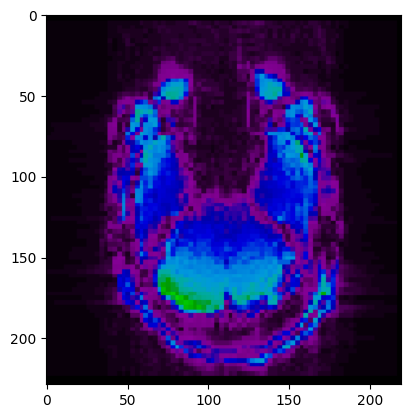

In [4]:
# Original code
img = image.load_img("D:/Datasets/Asd/train/autism/100128679-208.png")
plt.imshow(img)
cv2.imread("D:/Datasets/Asd/train/autism/100128679-208.png").shape
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory('D:/Datasets/Asd/train/', target_size=(200, 200), batch_size=3, class_mode='binary')
validation_dataset = validation.flow_from_directory('D:/Datasets/Asd/val/', target_size=(200, 200), batch_size=3, class_mode='binary')



In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Train the model and store history for plotting
history = model.fit(train_dataset, steps_per_epoch=89, epochs=523, validation_data=validation_dataset)

Epoch 1/523
89/89 [==============================] - 39s 424ms/step - loss: 0.7293 - accuracy: 0.5019 - val_loss: 1.0491 - val_accuracy: 0.5445
Epoch 2/523
89/89 [==============================] - 37s 416ms/step - loss: 0.7062 - accuracy: 0.5206 - val_loss: 0.7115 - val_accuracy: 0.4555
Epoch 3/523
89/89 [==============================] - 37s 421ms/step - loss: 0.6953 - accuracy: 0.5543 - val_loss: 0.6823 - val_accuracy: 0.5544
Epoch 4/523
89/89 [==============================] - 46s 525ms/step - loss: 0.6896 - accuracy: 0.5393 - val_loss: 0.7119 - val_accuracy: 0.5530
Epoch 5/523
89/89 [==============================] - 41s 461ms/step - loss: 0.6756 - accuracy: 0.6067 - val_loss: 0.6821 - val_accuracy: 0.5712
Epoch 6/523
89/89 [==============================] - 36s 411ms/step - loss: 0.6596 - accuracy: 0.6517 - val_loss: 0.7020 - val_accuracy: 0.6017
Epoch 7/523
89/89 [==============================] - 37s 420ms/step - loss: 0.6937 - accuracy: 0.5843 - val_loss: 0.6662 - val_accuracy:

In [6]:
# Save the model using joblib
model_filename = 'model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# Save the training history using joblib
history_filename = 'history.joblib'
joblib.dump(history.history, history_filename)
print(f"Training history saved as {history_filename}")

Model saved as model.joblib
Training history saved as history.joblib


In [6]:
accuracy=model.evaluate(validation_dataset)

712/712 [==============================] - 54s 75ms/step - loss: 2.1508 - accuracy: 0.8383


712/712 [==============================] - 26s 36ms/step


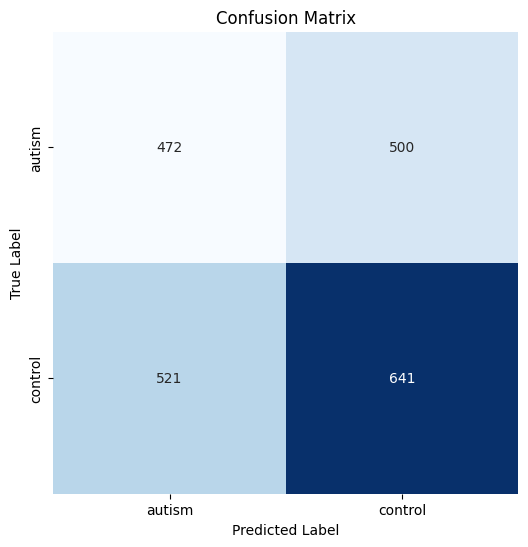

In [7]:
# 1. Confusion Matrix
val_predictions = model.predict(validation_dataset)
val_labels = validation_dataset.classes
conf_matrix = confusion_matrix(val_labels, np.round(val_predictions))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=validation_dataset.class_indices.keys(),
            yticklabels=validation_dataset.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


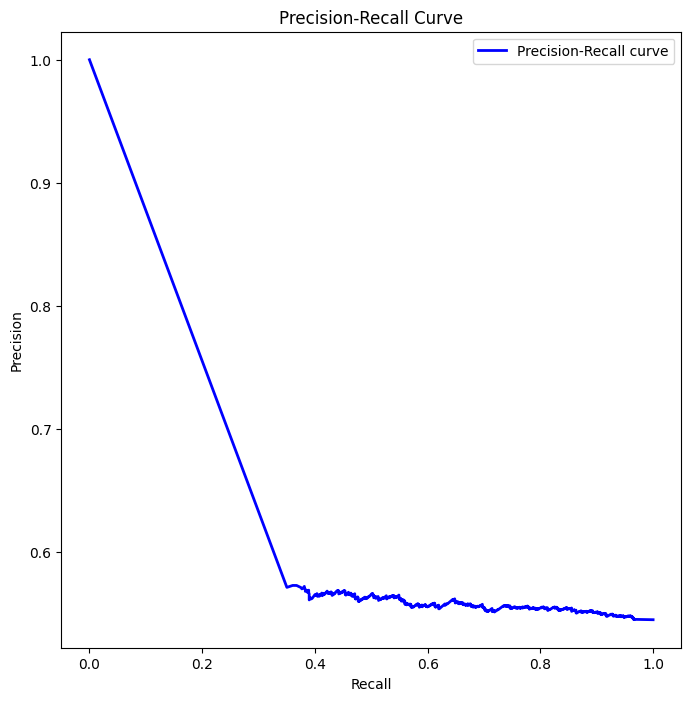

In [9]:
# 3. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(val_labels, val_predictions)
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


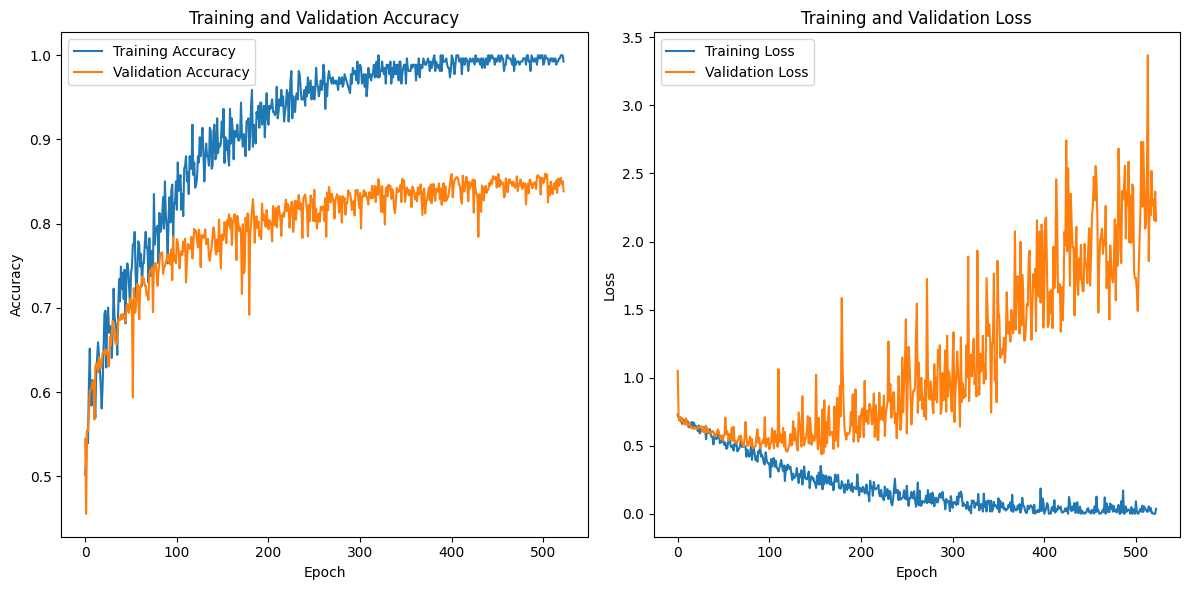

In [10]:
# 3. Accuracy and Loss Plots Over Epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# 4. Model Summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 64)       

100128698-212.png


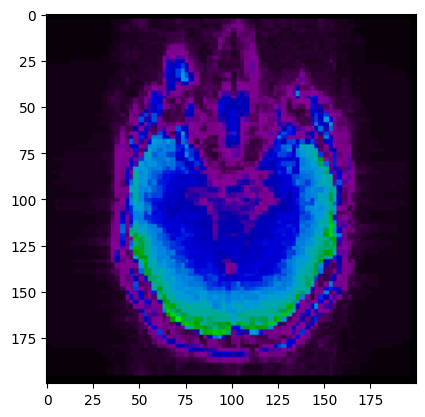

1/1 [==============================] - 1s 513ms/step
Yes Autism
100128699-784.png


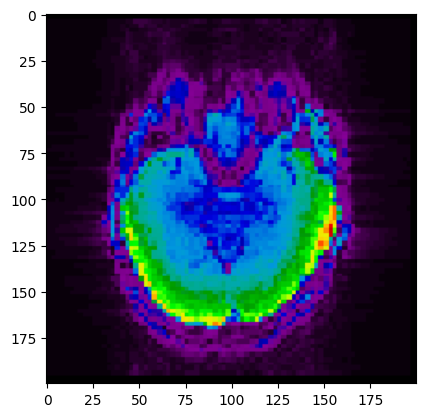

1/1 [==============================] - 0s 80ms/step
Yes Autism
100228698-212.png


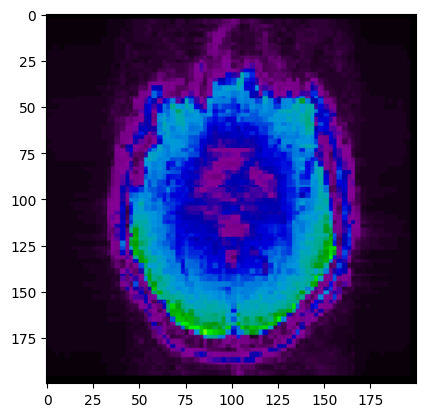

1/1 [==============================] - 0s 80ms/step
Yes Autism
100328698-212.png


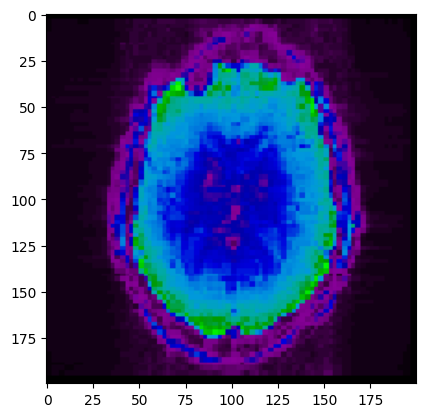

1/1 [==============================] - 0s 80ms/step
Yes Autism
100328699-784.png


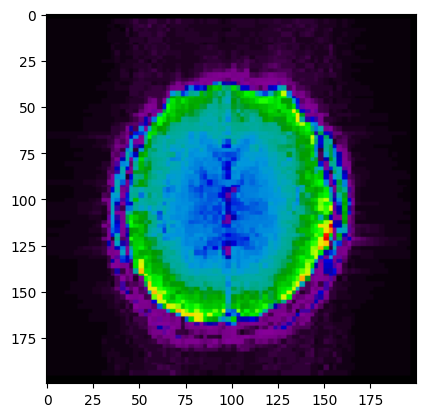

1/1 [==============================] - 0s 79ms/step
Yes Autism
100628699-784.png


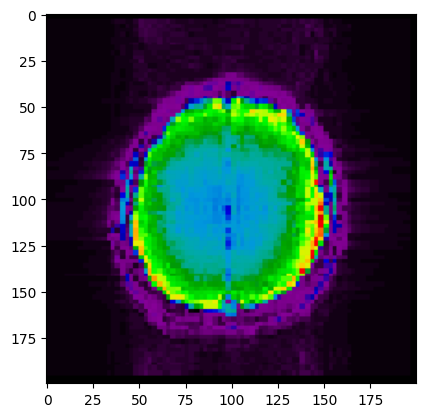

1/1 [==============================] - 0s 82ms/step
Yes Autism
100728698-212.png


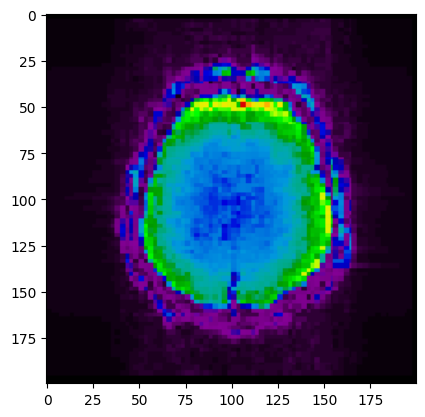

1/1 [==============================] - 0s 87ms/step
Yes Autism
102028698-213.png


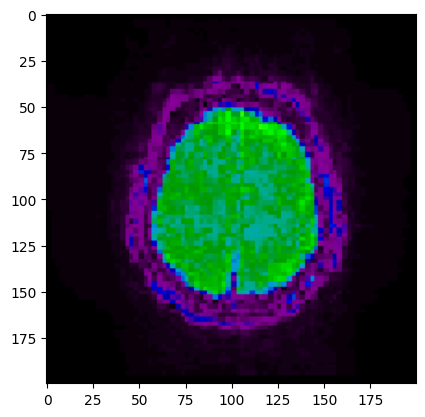

1/1 [==============================] - 0s 63ms/step
Yes Autism
102228700-786.png


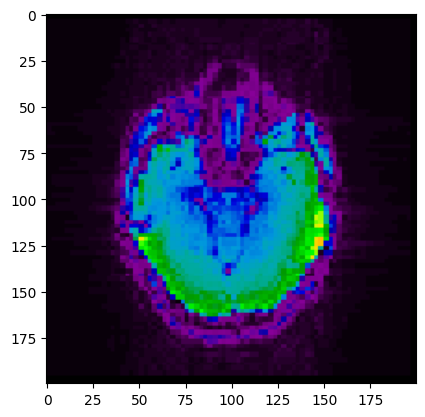

1/1 [==============================] - 0s 65ms/step
Yes Autism
102328700-786.png


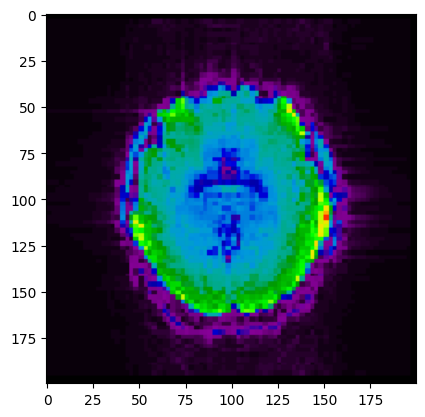

1/1 [==============================] - 0s 71ms/step
Yes Autism
102428700-786.png


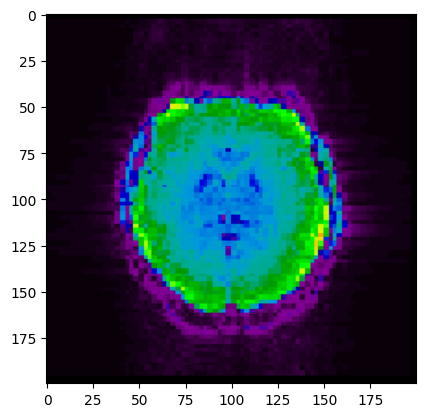

1/1 [==============================] - 0s 73ms/step
Yes Autism
102528705-214.png


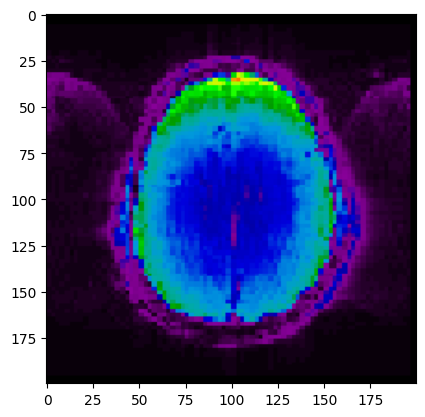

1/1 [==============================] - 0s 84ms/step
Yes Autism
102628700-786.png


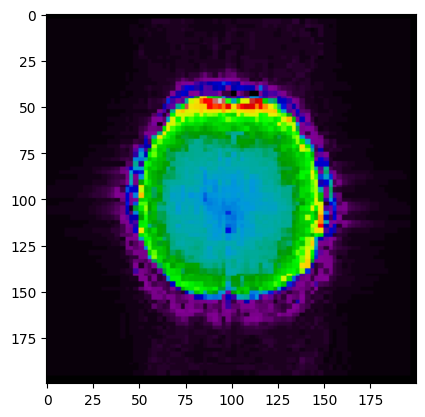

1/1 [==============================] - 0s 76ms/step
Yes Autism
102628705-214.png


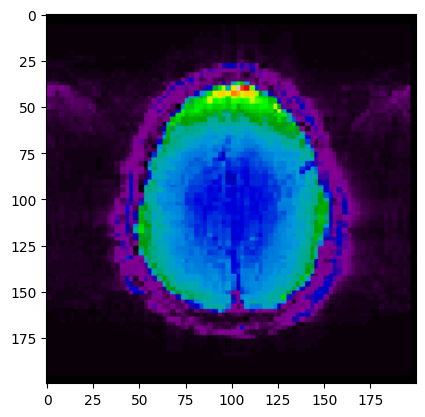

1/1 [==============================] - 0s 81ms/step
Yes Autism
103928705-215.png


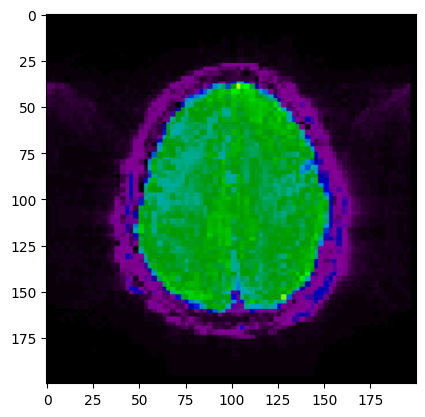

1/1 [==============================] - 0s 79ms/step
Yes Autism
104128705-216.png


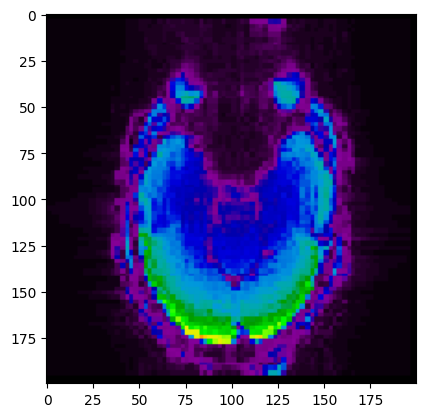

1/1 [==============================] - 0s 103ms/step
Yes Autism
104528705-216.png


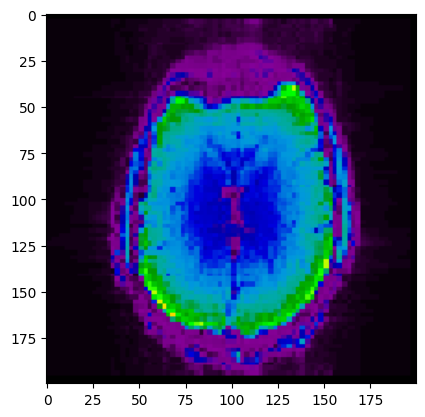

1/1 [==============================] - 0s 72ms/step
Yes Autism
105028701-788.png


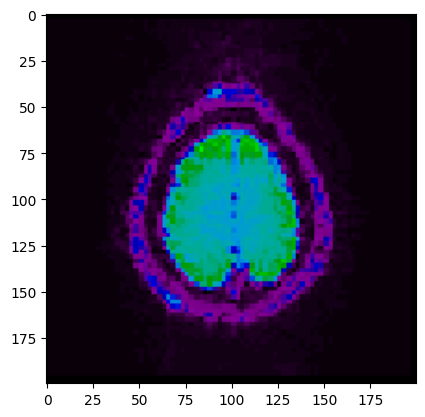

1/1 [==============================] - 0s 74ms/step
Yes Autism
105128701-789.png


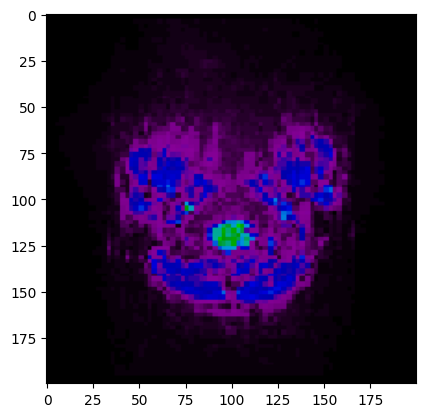

1/1 [==============================] - 0s 77ms/step
Yes Autism
105428701-789.png


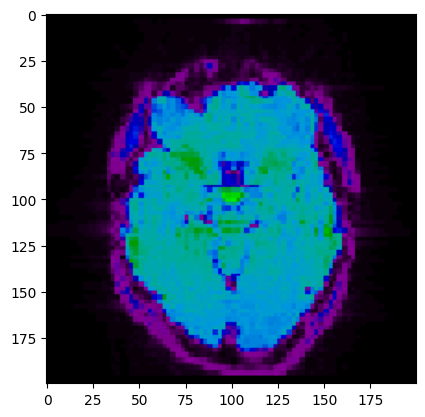

1/1 [==============================] - 0s 71ms/step
No Autism
105428705-217.png


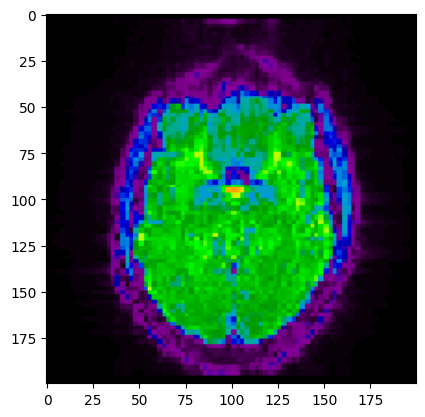

1/1 [==============================] - 0s 89ms/step
Yes Autism
106028705-217.png


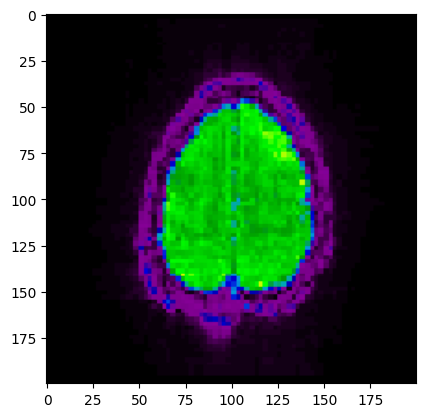

1/1 [==============================] - 0s 73ms/step
Yes Autism
106128702-790.png


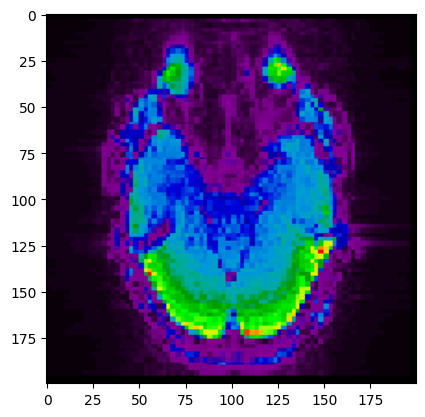

1/1 [==============================] - 0s 76ms/step
No Autism
106228706-218.png


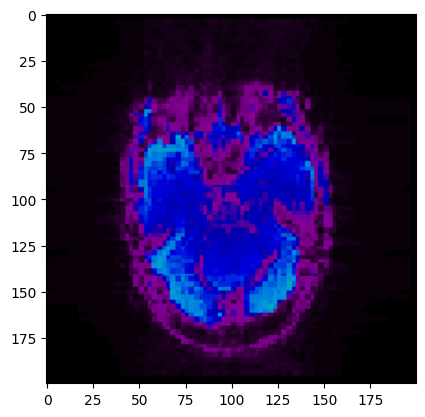

1/1 [==============================] - 0s 94ms/step
Yes Autism
106528702-790.png


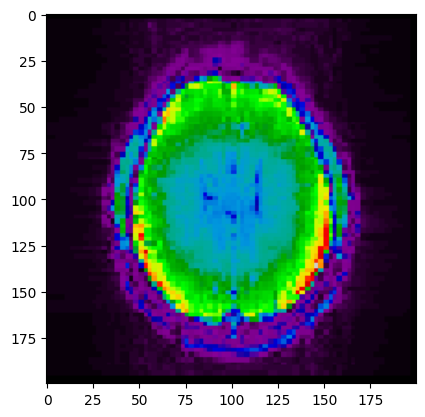

1/1 [==============================] - 0s 117ms/step
Yes Autism
107228706-219.png


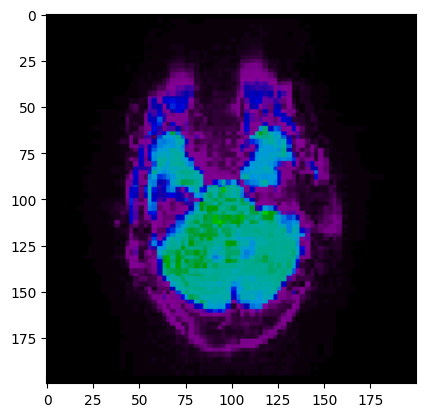

1/1 [==============================] - 0s 63ms/step
Yes Autism
107428702-791.png


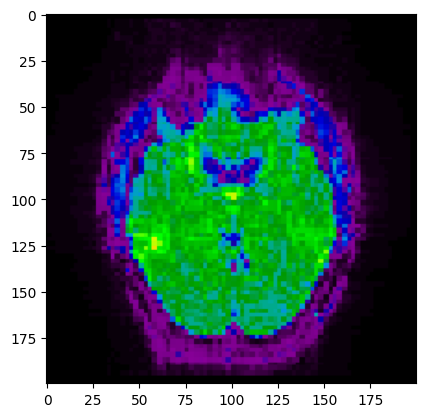

1/1 [==============================] - 0s 73ms/step
Yes Autism
107428706-219.png


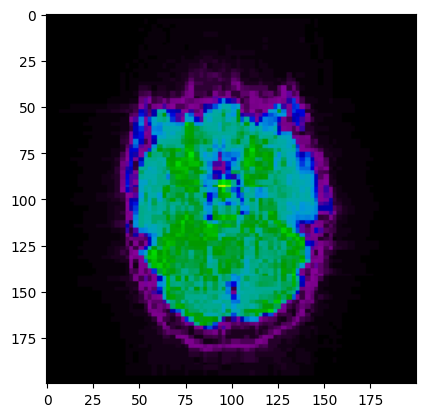

1/1 [==============================] - 0s 63ms/step
Yes Autism
129328718-782.png


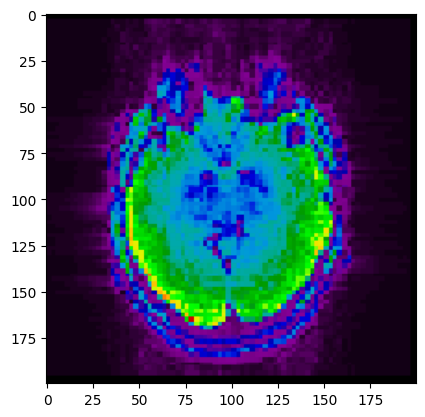

1/1 [==============================] - 0s 64ms/step
No Autism
129328940-167.png


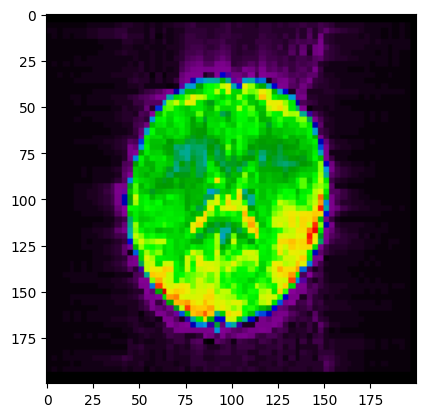

1/1 [==============================] - 0s 97ms/step
No Autism
129428718-782.png


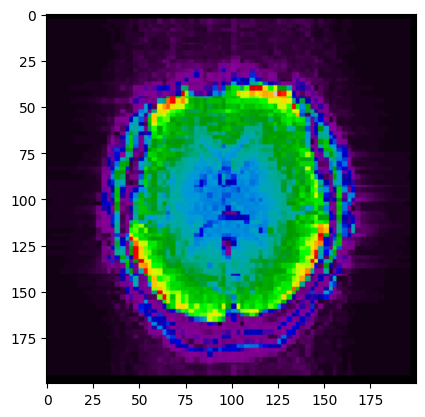

1/1 [==============================] - 0s 68ms/step
No Autism
129428940-167.png


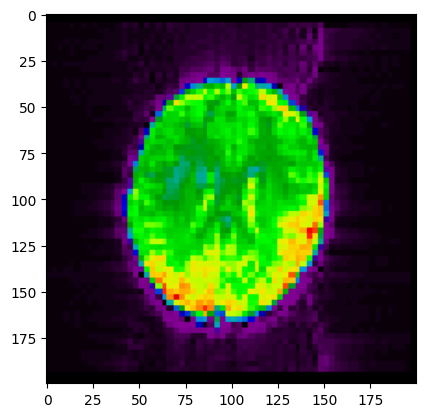

1/1 [==============================] - 0s 79ms/step
No Autism
130328718-783.png


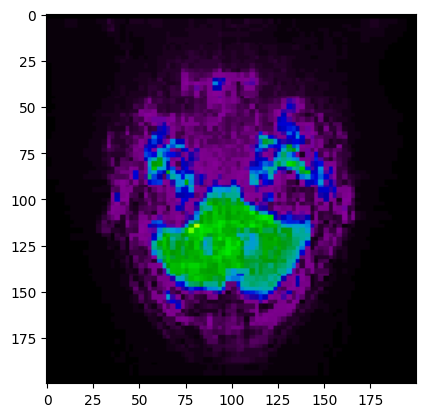

1/1 [==============================] - 0s 73ms/step
No Autism
130328940-168.png


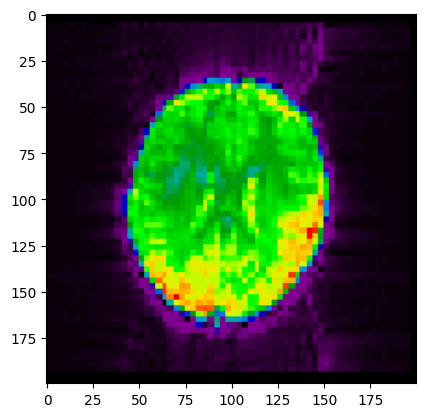

1/1 [==============================] - 0s 100ms/step
No Autism
130428718-783.png


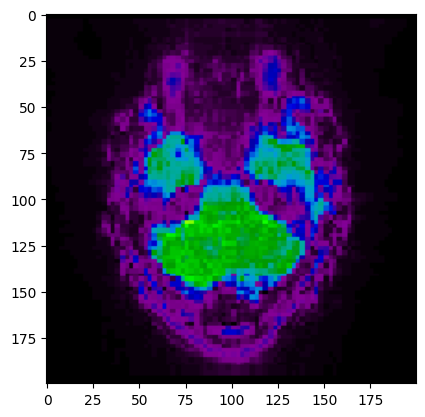

1/1 [==============================] - 0s 63ms/step
Yes Autism
130528718-783.png


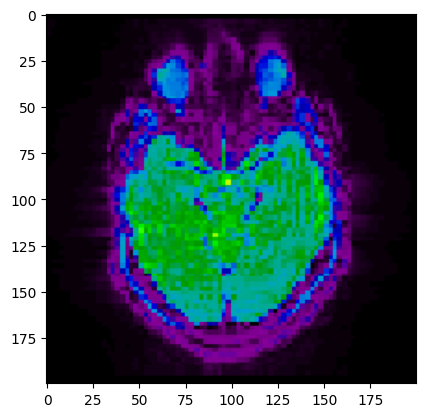

1/1 [==============================] - 0s 72ms/step
No Autism
131128752-101.png


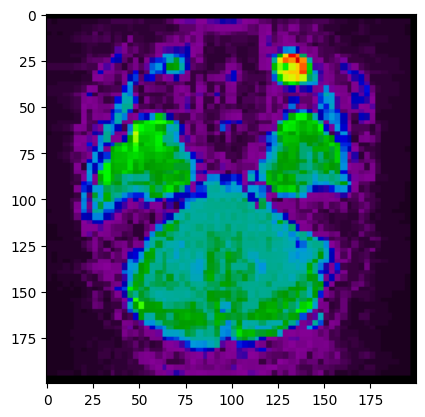

1/1 [==============================] - 0s 78ms/step
No Autism
131128963-169.png


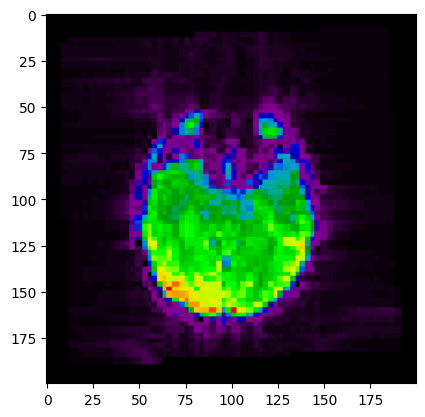

1/1 [==============================] - 0s 92ms/step
No Autism
131228752-101.png


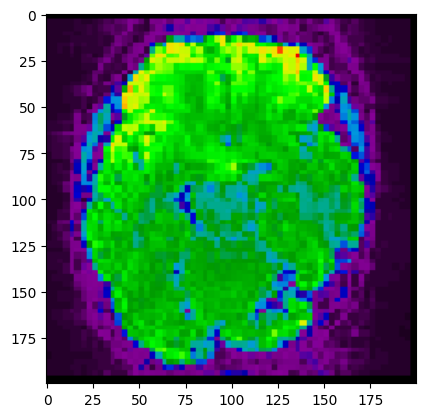

1/1 [==============================] - 0s 84ms/step
No Autism
131228963-169.png


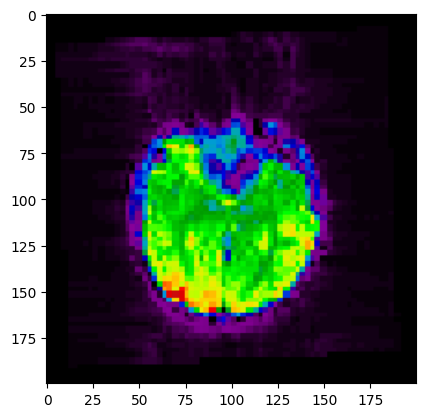

1/1 [==============================] - 0s 104ms/step
No Autism
131728752-101.png


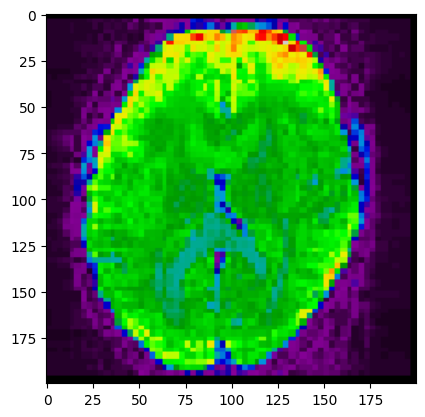

1/1 [==============================] - 0s 79ms/step
No Autism
131828752-101.png


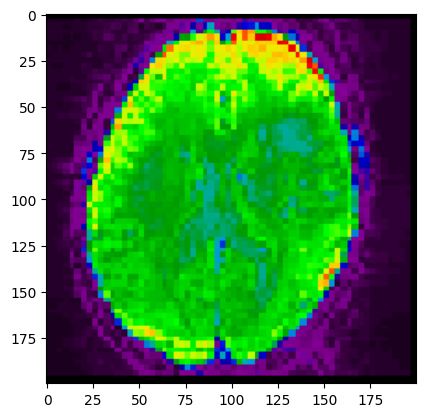

1/1 [==============================] - 0s 78ms/step
No Autism
131828963-169.png


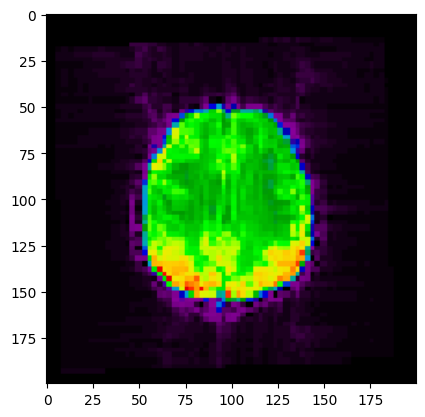

1/1 [==============================] - 0s 78ms/step
No Autism
131928963-169.png


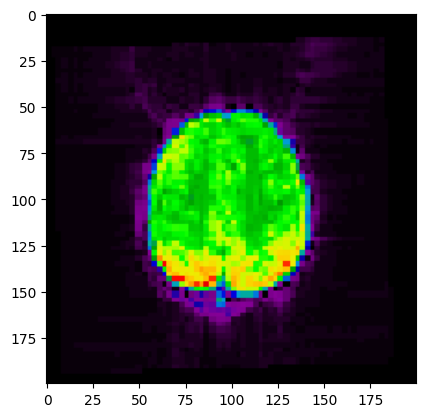

1/1 [==============================] - 0s 94ms/step
No Autism


In [5]:
import os
import joblib
model = joblib.load('model.joblib')

dir_path='D:/Datasets/Asd/test'
for i in os.listdir(dir_path):
     print (i)
     img =image.load_img(dir_path+'//'+i,target_size=(200, 200))
     plt.imshow(img)
     plt.show()
     x=image.img_to_array(img)
     x=np.expand_dims(x,axis=0)
     images=np.vstack([x])
     val=model.predict(images)
     if val==0:
       print("No Autism")
     else:
       print("Yes Autism")